In [150]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as pe
from pytrends.request import TrendReq 

Setup Pytrend and Keyword defined


In [151]:
pytrends=TrendReq(hl='en-US',tz=360)
keyword=input('Enter any word: ')

Data Request

In [152]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

Country Wise Interest

C:\Users\Admin\AppData\Local\Temp\ipykernel_5316\2971747873.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




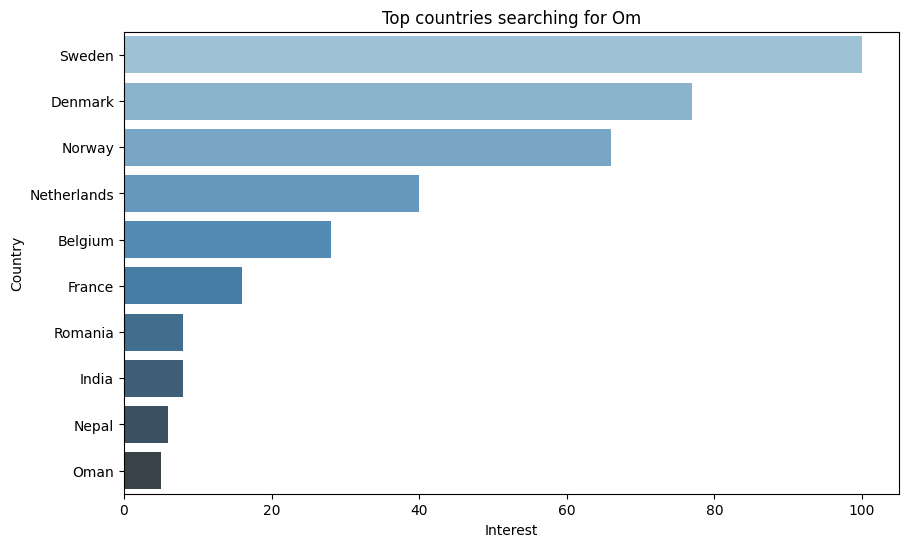

In [153]:
interest=pytrends.interest_by_region()
interest=interest.sort_values(by=keyword,ascending=False).head(10)
plt.figure(figsize=(10,6))
sb.barplot(x=interest[keyword],y=interest.index,palette='Blues_d')
plt.title(f"Top countries searching for {keyword}")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

World Map

In [154]:
interest=interest.reset_index()
fig=pe.choropleth(interest,
                  locations='geoName',
                  locationmode='country names',
                  color=keyword,
                  title=f"Search for {keyword} by country",
                  color_continuous_scale='Blues')
fig.show()

Time Wise Interest

In [155]:
time_df=pytrends.interest_over_time()


c:\Users\Admin\Desktop\Jupyter\venv\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



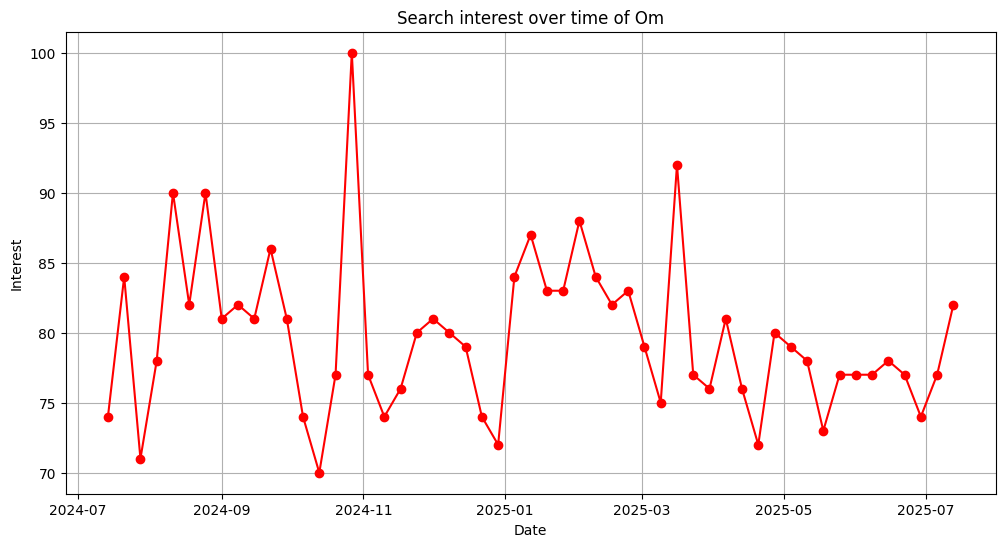

In [156]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='red')
plt.title(f"Search interest over time of {keyword}")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

Multiple Keywords Compare

In [163]:
list=[]
for i in range(3):
    word=input("Enter max 5 words: ")
    list.append(word)
pytrends.build_payload(list,cat=0,timeframe='today 12-m',geo='',gprop='')

c:\Users\Admin\Desktop\Jupyter\venv\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



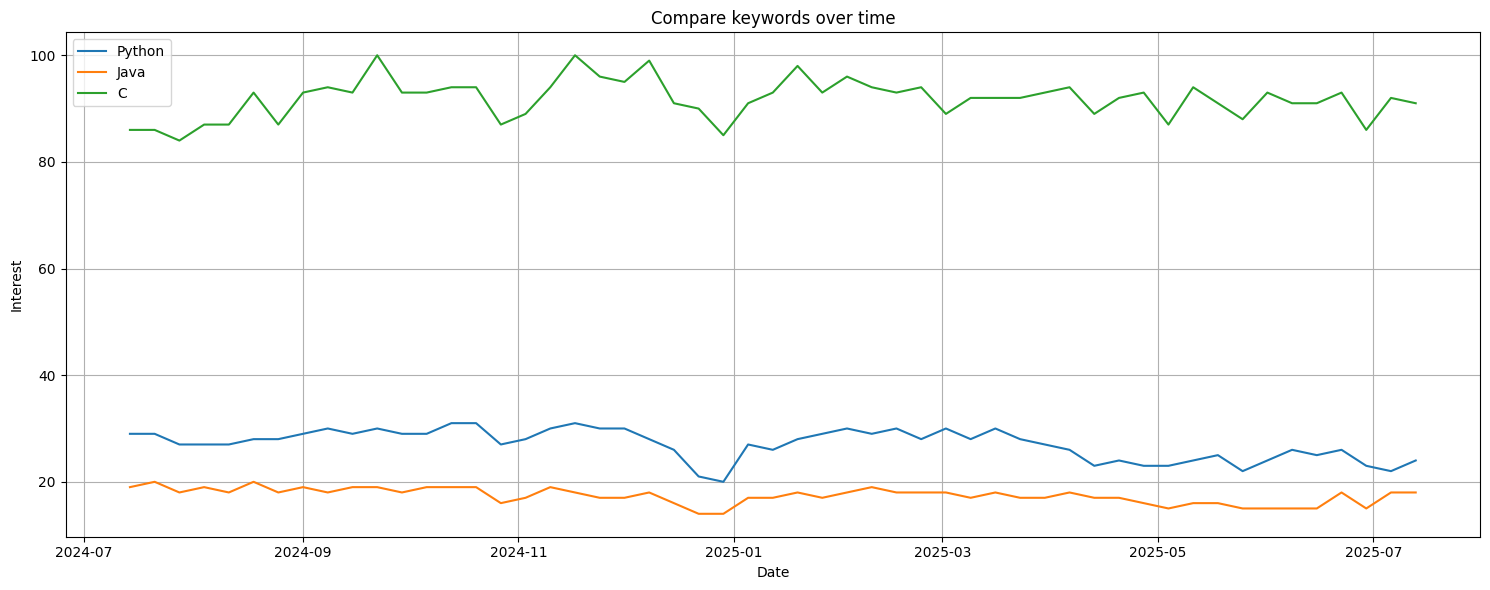

In [164]:
compare_df=pytrends.interest_over_time()
plt.figure(figsize=(15,6))
for item in list:
    plt.plot(compare_df.index,compare_df[item],label=item)
plt.title("Compare keywords over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
